Модель збережена на диск.
Точність: 0.91
Точність (Precision): 0.91
Відзив (Recall): 0.93
F1 Score: 0.92


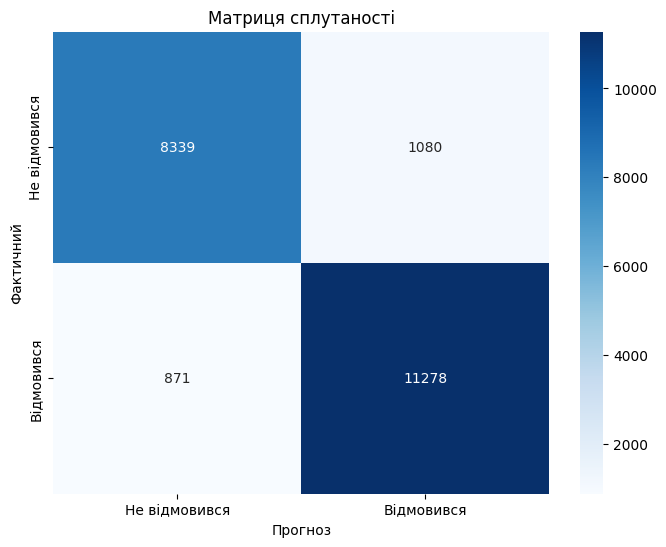

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

# Завантаження даних
data = pd.read_csv('../data/internet_service_churn_scaled.csv')

# # Ідентифікація категоріальних і числових змінних
# categorical_features = ['is_tv_subscriber', 'is_movie_package_subscriber']
# numeric_features = [col for col in data.columns if col not in categorical_features + ['churn']]

# # Трансформер для обробки даних
# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', StandardScaler(), numeric_features),
#         ('cat', OneHotEncoder(), categorical_features)
#     ])

# Вибір найбільш важливих ознак
feature_selector = SelectKBest(score_func=f_classif, k='all')

# Створення пайплайна з відбором ознак
pipeline = Pipeline(steps=[
    ('preprocessor', FeatureUnion([
        # ('features', preprocessor),
        ('selector', feature_selector)
    ])),
    ('classifier', SVC(random_state=42))
])

# Розділення даних
X = data.drop('churn', axis=1)
y = data['churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Навчання моделі
pipeline.fit(X_train, y_train)

# Збереження моделі
joblib.dump(pipeline, '../models/svm_model_by_pipeline.pkl')
print("Модель збережена на диск.")

# Завантаження моделі
loaded_model = joblib.load('../models/svm_model_by_pipeline.pkl')

# Оцінка завантаженої моделі
y_pred = loaded_model.predict(X_test)

# Оцінка моделі
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Точність: {accuracy:.2f}")
print(f"Точність (Precision): {precision:.2f}")
print(f"Відзив (Recall): {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# Графічне відображення матриці сплутаності
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Не відмовився', 'Відмовився'],
            yticklabels=['Не відмовився', 'Відмовився'])
plt.xlabel('Прогноз')
plt.ylabel('Фактичний')
plt.title('Матриця сплутаності')
plt.show()